In [1250]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
from  pandas import tseries

from datetime import datetime, timedelta

plt.style.use('ggplot')

In [1333]:
# Путь до папки с данными
path_to_data = 'datasets/'

In [1334]:
meteo_data = pd.read_csv(path_to_data + 'meteo/4263131.csv', sep = ';')
meteo_data

,station_name,station_id,visibility_distance,visibility_distance_quality,wind_direction,wind_direction_quality,wind_speed_avg,wind_speed_avg_quality,wind_speed_sign,wind_speed_max,...,wind_speed_max_sign,precipitation_amount,precipitation_amount_quality,temperature_ground,temperature_ground_quality,temperature_air,temperature_air_quality,humidity,humidity_quality,time
0,GAMOV,4263131,NaN,6,254.0,0,5.0,0,NaN,7.0,...,NaN,NaN,5,NaN,6,1.2,0,76.0,0,2013-04-17 21:00:00
1,GAMOV,4263131,NaN,6,NaN,6,NaN,6,NaN,NaN,...,NaN,NaN,5,NaN,6,NaN,6,NaN,6,2013-04-17 18:00:00
2,GAMOV,4263131,NaN,6,NaN,6,NaN,6,NaN,NaN,...,NaN,NaN,5,NaN,6,NaN,6,NaN,6,2013-04-17 15:00:00
3,GAMOV,4263131,NaN,6,NaN,6,NaN,6,NaN,NaN,...,NaN,NaN,5,NaN,6,NaN,6,NaN,6,2013-04-17 12:00:00
4,GAMOV,4263131,NaN,6,233.0,0,7.0,0,NaN,10.0,...,NaN,NaN,5,NaN,6,3.4,0,75.0,0,2013-04-17 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93003,GAMOV,4263131,98.0,0,20.0,0,9.0,0,NaN,18.0,...,NaN,NaN,5,12.4,0,15.6,0,88.0,0,2000-05-31 21:00:00
93004,GAMOV,4263131,98.0,0,70.0,0,8.0,0,NaN,16.0,...,NaN,NaN,5,17.2,0,13.7,0,94.0,0,2000-05-31 00:00:00
93005,GAMOV,4263131,98.0,0,55.0,0,9.0,0,NaN,15.0,...,NaN,NaN,5,19.0,0,12.0,0,85.0,0,2000-05-31 03:00:00
93006,GAMOV,4263131,98.0,0,65.0,0,10.0,0,NaN,18.0,...,NaN,NaN,5,17.6,0,10.6,0,88.0,0,2000-05-31 06:00:00


In [1335]:
s2m = pd.read_pickle(path_to_data + 'processed_data/s2m.pkl')
s2m

,meteo_id,dist
station_id,,
5674,4943321,81.846330
5216,4433241,21.467114
6256,5172691,62.347672
5132,4483421,27.216443
5151,4393311,1.111949
...,...,...
5663,5053701,54.865708
6363,5313301,1.111949
5765,4433331,34.617072


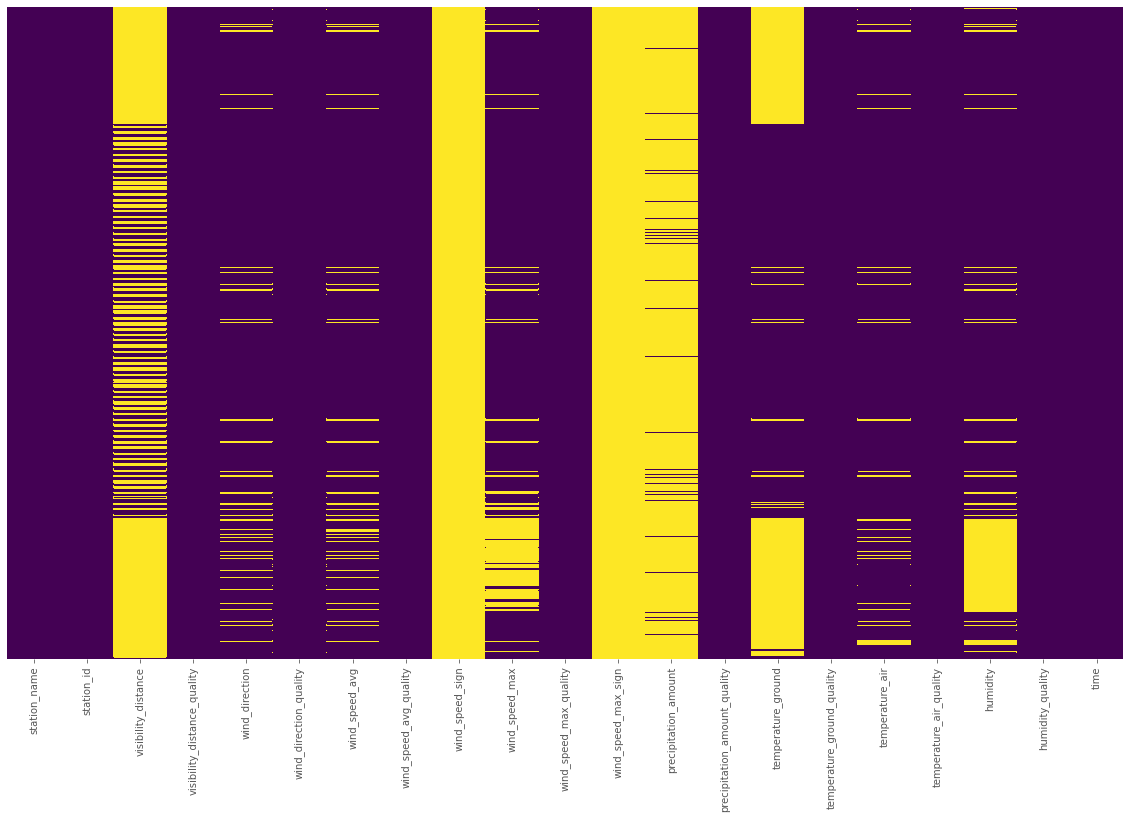

In [1336]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(meteo_data.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [1337]:
data = pd.read_pickle(path_to_data + 'processed_data/daily.pkl')
ice_data = pd.read_pickle(path_to_data + 'processed_data/ice.pkl')

In [1339]:
data['station_id']

198

In [1273]:
ice_data = pd.read_pickle(path_to_data + 'processed_data/ice.pkl')

In [1274]:
data = data.sort_values(by=['station_id','date'])
data = data.reset_index(drop=True)

In [1275]:
station_ids = [6331]
data = data[data['station_id'].isin(station_ids)]
ice_data = ice_data[ice_data['station_id'].isin(station_ids)] 
data

,date,stage_avg,stage_min,stage_max,temp,water_code,station_id
1720837,1984-01-01,86.0,86.0,86.0,NaN,16.00,6331
1720838,1984-01-02,83.0,83.0,83.0,NaN,16.00,6331
1720839,1984-01-03,81.0,81.0,81.0,NaN,16.00,6331
1720840,1984-01-04,80.0,80.0,80.0,NaN,16.00,6331
1720841,1984-01-05,79.0,79.0,79.0,NaN,16.00,6331
...,...,...,...,...,...,...,...
1733220,2017-12-27,155.0,155.0,155.0,NaN,16.33,6331
1733221,2017-12-28,152.0,152.0,152.0,NaN,16.33,6331
1733222,2017-12-29,152.0,152.0,152.0,NaN,16.33,6331
1733223,2017-12-30,151.0,151.0,151.0,NaN,16.33,6331


In [1276]:
ice_data = ice_data.set_index('date')
ice_data

,ice_thickness,snow_height,place,station_id
date,,,,
1984-01-10,83.0,7.0,1,6331
1984-01-20,92.0,6.0,1,6331
1984-01-31,105.0,24.0,1,6331
1984-02-10,108.0,19.0,1,6331
1984-02-20,113.0,18.0,1,6331
...,...,...,...,...
2017-11-20,30.0,14.0,1,6331
2017-11-30,38.0,13.0,1,6331
2017-12-10,45.0,17.0,1,6331


In [1277]:
data = data.set_index('date').asfreq('D')

In [1278]:
data['stage_max'].isna()

date
1984-01-01    False
1984-01-02    False
1984-01-03    False
1984-01-04    False
1984-01-05    False
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30    False
2017-12-31    False
Freq: D, Name: stage_max, Length: 12419, dtype: bool

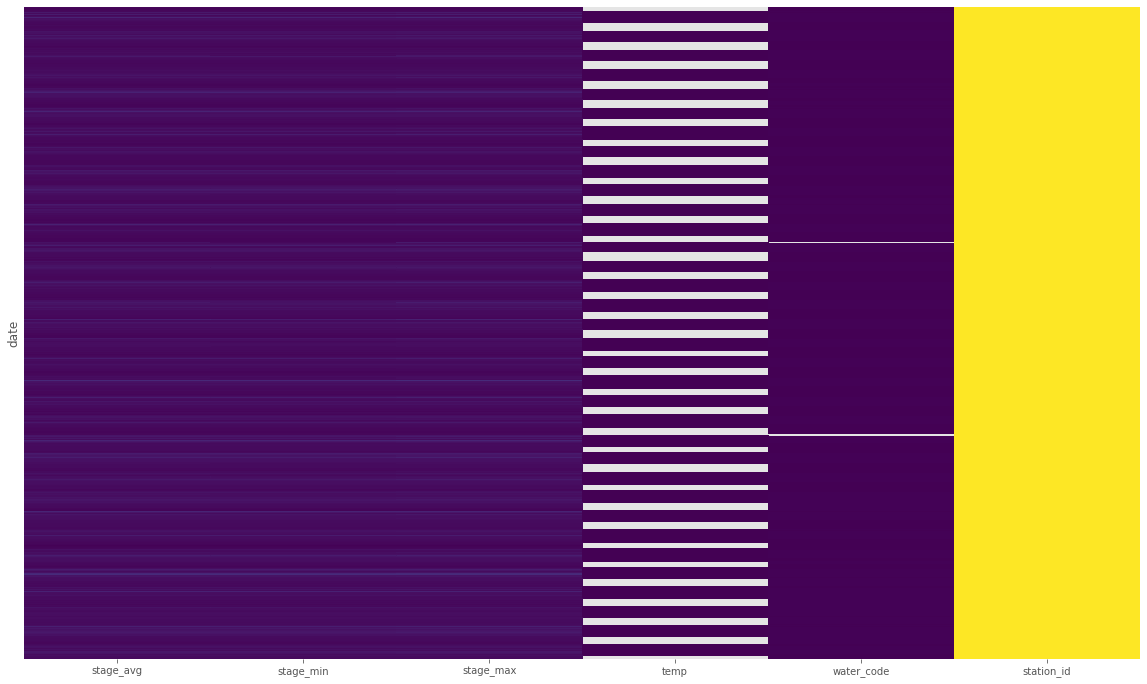

In [1279]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data, yticklabels=False, cbar=False, cmap='viridis')

In [1280]:
data = data.interpolate()

<AxesSubplot:xlabel='date'>

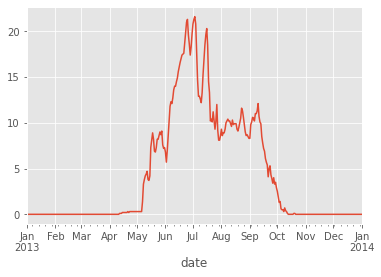

In [1281]:
data.interpolate(method = 'time')['2013-01-01':'2014-01-01']['temp'].plot()

In [1282]:
# from scipy.special import boxcox1p

In [1283]:
# data['stage_maxt'], _ = stats.boxcox1p(data['stage_max'])

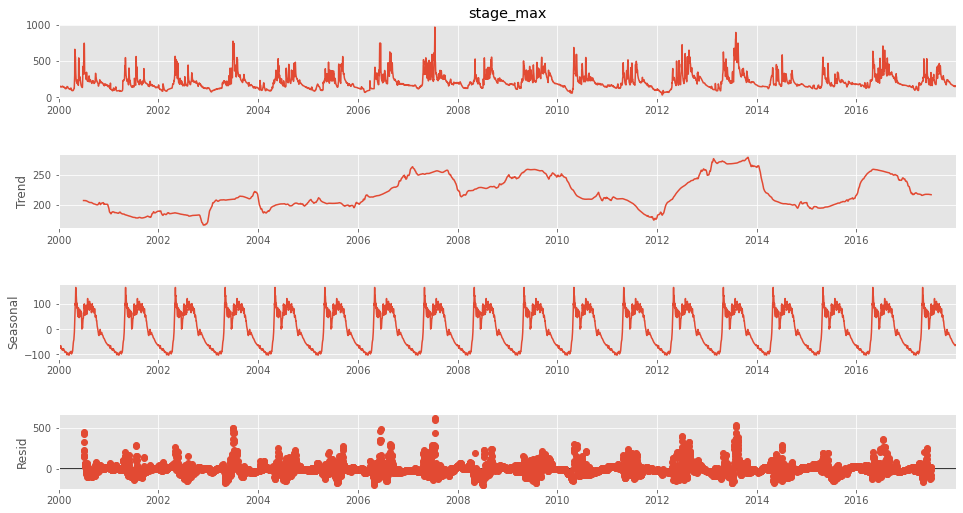

In [1284]:
d = sm.tsa.seasonal_decompose(data['stage_max'].loc['2000-01-01':'2018-01-01'], period=365)
fig = d.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

<AxesSubplot:xlabel='date'>

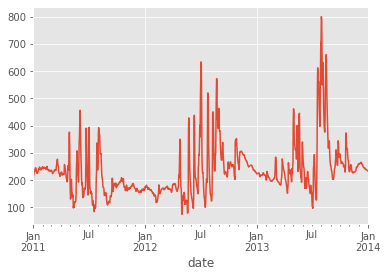

In [1285]:
(d.trend + d.resid)['2011-01-01':'2014-01-01'].plot()

<AxesSubplot:xlabel='date'>

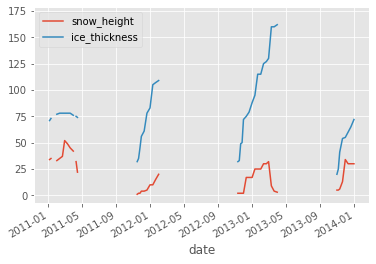

In [1286]:
ice_data[['snow_height', 'ice_thickness']]['2011-01-01':'2014-01-01'].plot()

# ice_data['snow_height']['2011-01-01':'2014-01-01'].plot()

1984

In [1288]:
def get_acc_ice(data, year):
    return data['ice_thickness'][datetime(year=year - 1, month = 10, day = 1) : datetime(year=year, month = 5, day = 1)].sum()

def get_acc_snow(data, year):
    return data['snow_height'][datetime(year=year - 1, month = 10, day = 1) : datetime(year=year, month = 5, day = 1)].sum()

In [1320]:
data.index[:10].apply( lambda x : print(x.index))

AttributeError: 'DatetimeIndex' object has no attribute 'apply'

In [1270]:
mean_absolute_error(((d.seasonal + d.trend + d.resid).loc['1990-01-01':'2015-01-01']).values, (data['stage_max'].loc['1990-01-01':'2015-01-01']).values) 

ValueError: Found input variables with inconsistent numbers of samples: [5480, 9132]

In [1086]:
len(((d.seasonal + d.trend).loc['1990-01-01':'2015-01-01']).values)

9132

In [1087]:
len((data['stage_max'].loc['1990-01-01':'2015-01-01']).values)

0

Series([], Freq: D, Name: stage_max, dtype: float64)

In [1079]:
data['stage_max'].loc['1990-01-01':'2015-01-01'].isna().sum()

0

In [ ]:
).plot(figsize = (20,10))

In [1019]:
np.linspace(0, 365, num=365)

array([  0.        ,   1.00274725,   2.00549451,   3.00824176,
         4.01098901,   5.01373626,   6.01648352,   7.01923077,
         8.02197802,   9.02472527,  10.02747253,  11.03021978,
        12.03296703,  13.03571429,  14.03846154,  15.04120879,
        16.04395604,  17.0467033 ,  18.04945055,  19.0521978 ,
        20.05494505,  21.05769231,  22.06043956,  23.06318681,
        24.06593407,  25.06868132,  26.07142857,  27.07417582,
        28.07692308,  29.07967033,  30.08241758,  31.08516484,
        32.08791209,  33.09065934,  34.09340659,  35.09615385,
        36.0989011 ,  37.10164835,  38.1043956 ,  39.10714286,
        40.10989011,  41.11263736,  42.11538462,  43.11813187,
        44.12087912,  45.12362637,  46.12637363,  47.12912088,
        48.13186813,  49.13461538,  50.13736264,  51.14010989,
        52.14285714,  53.1456044 ,  54.14835165,  55.1510989 ,
        56.15384615,  57.15659341,  58.15934066,  59.16208791,
        60.16483516,  61.16758242,  62.17032967,  63.17


Parameter Value        Standard Deviation
a0        6.973914e+02 1.044497e+07
a1        3.880404e+01 7.273993e+06
a10       1.161090e+03 4.483491e+06
a11       7.765343e+03 1.633732e+07
a12       6.955987e+03 3.098904e+06
a13       -5.131286e+03 2.193859e+06
a14       -1.270582e+04 nan
a15       -7.635699e+03 9.315855e+06
a16       -2.676080e+03 nan
a17       -4.045969e+03 8.320090e+06
a18       1.906632e+03 nan
a19       8.832101e+03 nan
a2        1.125496e+03 nan
a20       6.694688e+03 6.586739e+05
a21       7.571712e+03 nan
a22       5.158995e+03 nan
a23       -8.447432e+03 nan
a24       -1.153842e+04 nan
a25       -2.205570e+02 nan
a26       4.832504e+03 nan
a27       1.411402e+03 nan
a28       -5.592599e+02 nan
a29       -2.209173e+02 nan
a3        3.553239e+03 5.144563e+06
a30       4.956256e+00 nan
a4        3.111726e+03 nan
a5        -1.380391e+03 nan
a6        -1.041111e+04 1.808078e+07
a7        -6.828522e+03 9.674704e+06
a8        6.174865e+03 9.525067e+06
a9        4.73538

C:\Users\taras\Anaconda3\lib\site-packages\symfit\core\fit_results.py:114: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.variance(param))


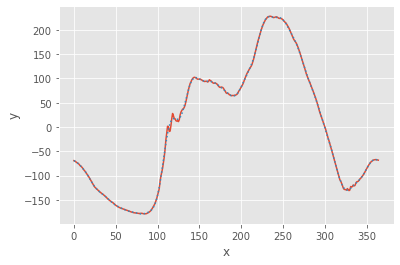

In [1028]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import matplotlib.pyplot as plt

def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                     for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

x, y = variables('x, y')
w, = parameters('w')
model_dict = {y: fourier_series(x, f=w, n=30)}
# print(model_dict)

# Make step function data
xdata = range(0, 365)
ydata = d.seasonal[:365].values
# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()
print(fit_result)

# Plot the result
plt.plot(xdata, ydata)
plt.plot(xdata, fit.model(x=xdata, **fit_result.params).y, ls=':')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [1058]:
k = 30

In [1059]:
mean_absolute_error(d.seasonal[365*(k+1):365*(k+2)].values, d.seasonal[:365].values)

0.0

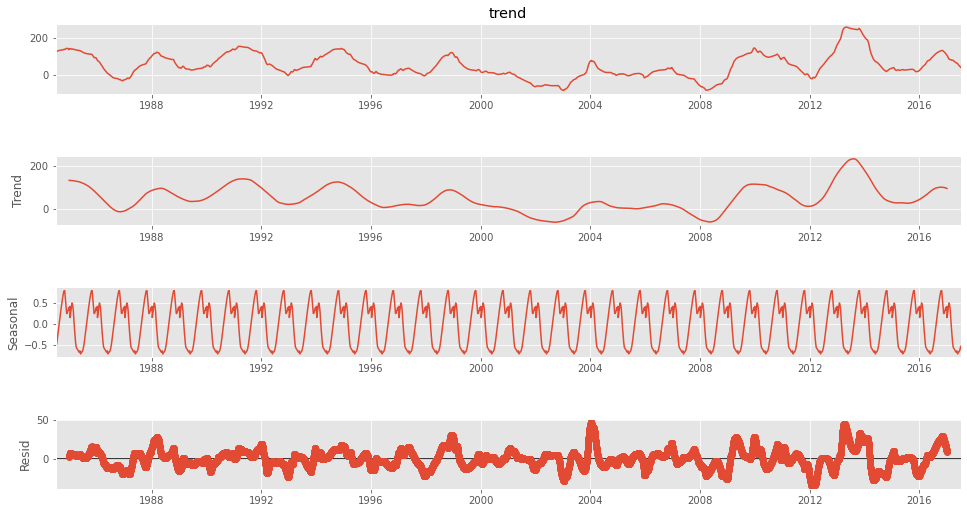

In [728]:
d1 = sm.tsa.seasonal_decompose(d.trend[~np.isnan(d.trend)],period=365)
fig = d1.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

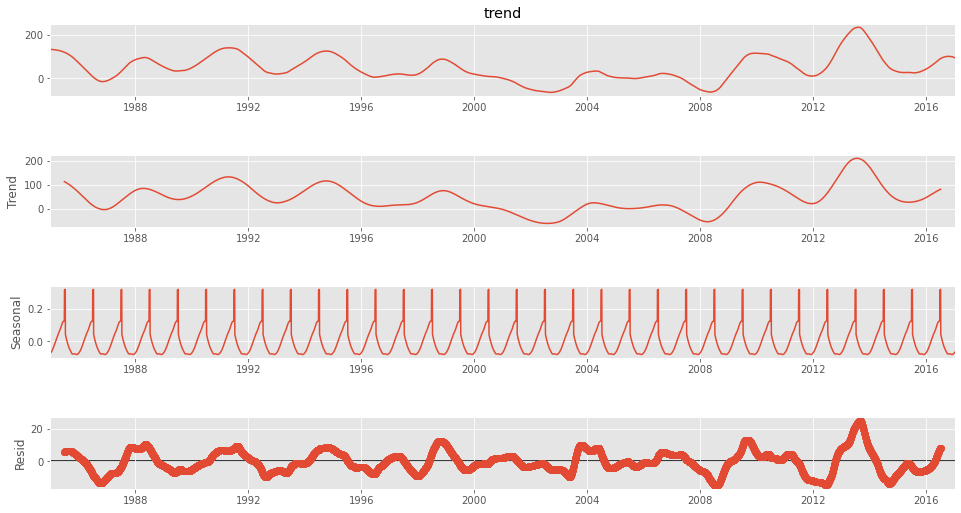

In [729]:
d2 = sm.tsa.seasonal_decompose(d1.trend[~np.isnan(d1.trend)],period=365)
fig = d2.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

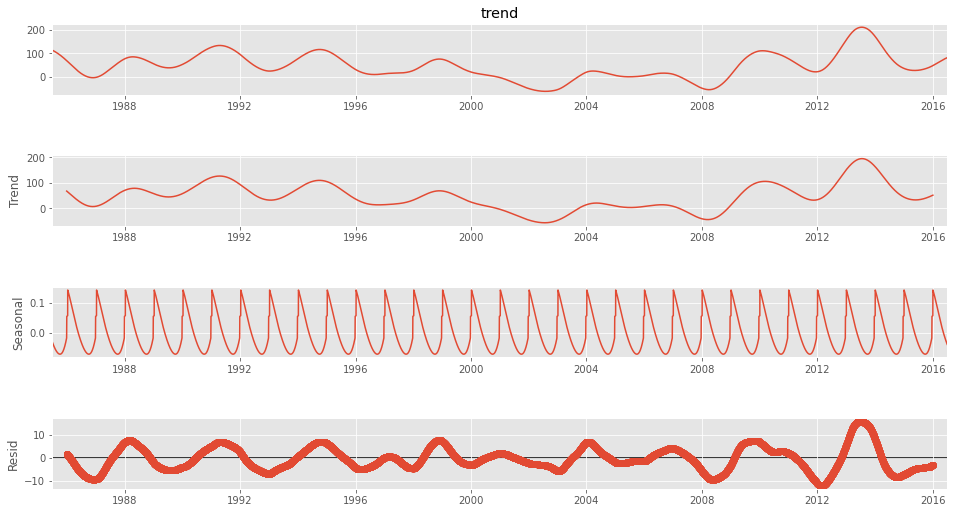

In [730]:
d3 = sm.tsa.seasonal_decompose(d2.trend[~np.isnan(d2.trend)],period=365)
fig = d3.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

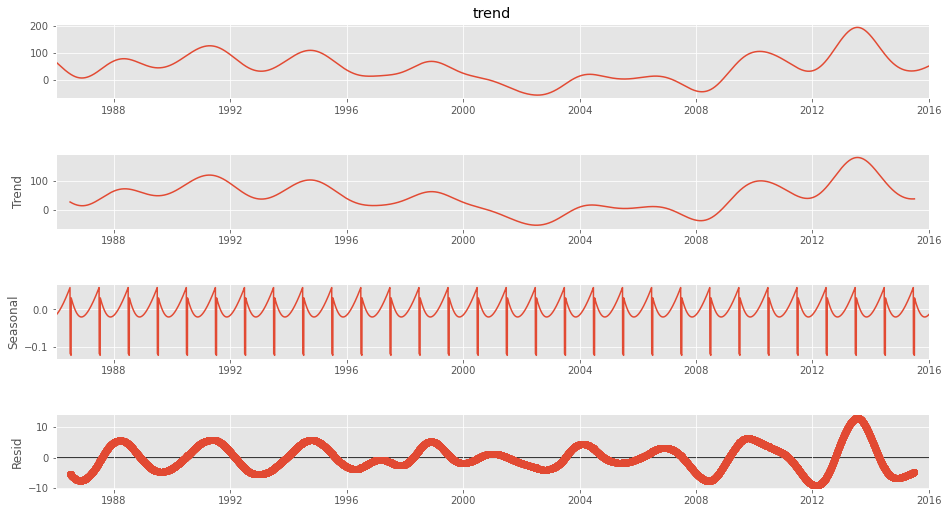

In [731]:
d4 = sm.tsa.seasonal_decompose(d3.trend[~np.isnan(d3.trend)],period=365)
fig = d4.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [716]:
np.count_nonzero(np.isnan(d.trend))

364

In [717]:
y = data['stage_max'].copy()

In [718]:
y

date
1984-01-01   -50.0
1984-01-02   -52.0
1984-01-03   -54.0
1984-01-04   -56.0
1984-01-05   -58.0
              ... 
2017-12-27   -63.0
2017-12-28   -64.0
2017-12-29   -64.0
2017-12-30   -64.0
2017-12-31   -65.0
Name: stage_max, Length: 12419, dtype: float64

In [678]:
import statsmodels.api as sm

In [868]:
start_d = '2000-03-31'
end_d = '2012-03-31'

test_start_d = '2012-04-01'
test_end_d = '2012-04-10'

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0625      0.146      0.429      0.668      -0.223       0.348
drift      -3.053e-05   5.48e-05     -0.557      0.577      -0.000    7.68e-05
ar.L1          0.8346      0.036     23.504      0.000       0.765       0.904
ma.L1         -0.1254      0.036     -3.447      0.001      -0.197      -0.054
ma.L2         -0.2297      0.025     -9.091      0.000      -0.279      -0.180
ma.L3         -0.0871      0.015     -5.764      0.000      -0.117      -0.058
ma.L4         -0.0844      0.010     -8.586      0.000      -0.104      -0.065
ar.S.L12    8.984e-05      0.015      0.006      0.995      -0.029       0.029
sigma2        75.0230      0.489    153.553      0.000      74.065      75.981


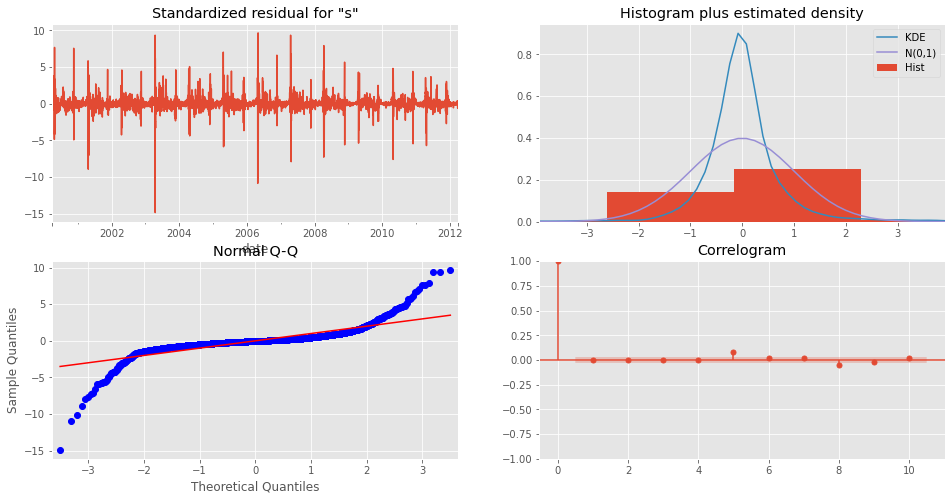

In [955]:
mod = sm.tsa.statespace.SARIMAX(data['stage_max'].loc[start_d: end_d],
                                order = (1, 1, 4),
                                seasonal_order = (1,0,0,12*1),
                                frequency ='D',
                                enforce_invertibility=True,
                                trend = 'ct')
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [956]:
y_pred = results.forecast(steps = 10) #start=test_start_d, dynamic=1000000).predicted_mean
y_true = data['stage_max'].loc[test_start_d : test_end_d]
#predict_dy_ci = predict_dy.conf_int()

In [957]:
y_pred

2012-04-01   -152.675207
2012-04-02   -153.719508
2012-04-03   -154.601281
2012-04-04   -155.247872
2012-04-05   -155.858991
2012-04-06   -156.440447
2012-04-07   -156.997793
2012-04-08   -157.534329
2012-04-09   -158.053662
2012-04-10   -158.558835
Freq: D, Name: predicted_mean, dtype: float64

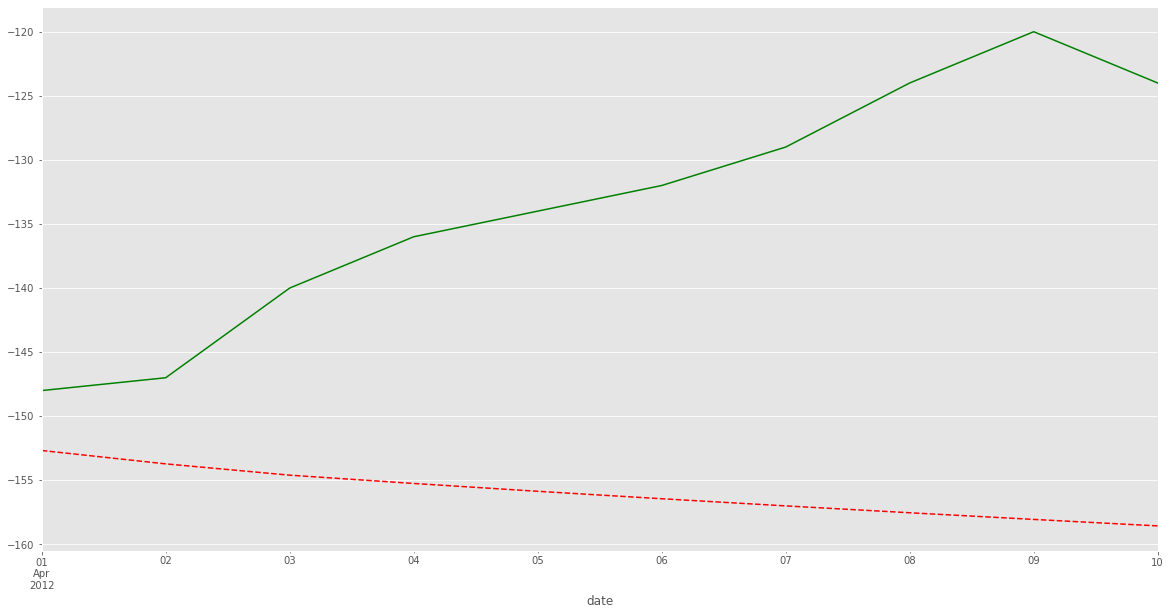

In [958]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10))

for (t, st) in zip([y_pred, y_true],['--r', '-g']):
    t.plot(style=st, label='Dynamic forecast (1978)')

In [959]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_true)

22.56879241456235

In [960]:
def nse(simulations, evaluation):
    """Nash-Sutcliffe Efficiency (NSE)"""
    nse_ = 1 - (
            np.sum((evaluation - simulations) ** 2, axis=0, dtype=np.float64)
            / np.sum((evaluation - np.mean(evaluation)) ** 2, dtype=np.float64)
    )

    return nse_

In [961]:
nse(y_pred.values, y_true.values)

-6.595184066337274